In [1]:
%matplotlib widget

from dataclasses import asdict
import gym
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

from lux_entry.heuristics import bidding, factory_placement
from lux_entry.wrappers.controllers import ControllerWrapper
from lux_entry.wrappers.observations import ObservationWrapper, partial_obs_from
from lux_entry.wrappers.skip_phases import MainGameOnlyWrapper

In [2]:
env = gym.make("LuxAI_S2-v0")
env = MainGameOnlyWrapper(
    env,
    bid_policy=bidding.zero_bid,
    factory_placement_policy=factory_placement.place_near_random_ice,
    controller=ControllerWrapper(env.env_cfg),
)
env = ObservationWrapper(env)
full_obs = env.reset();

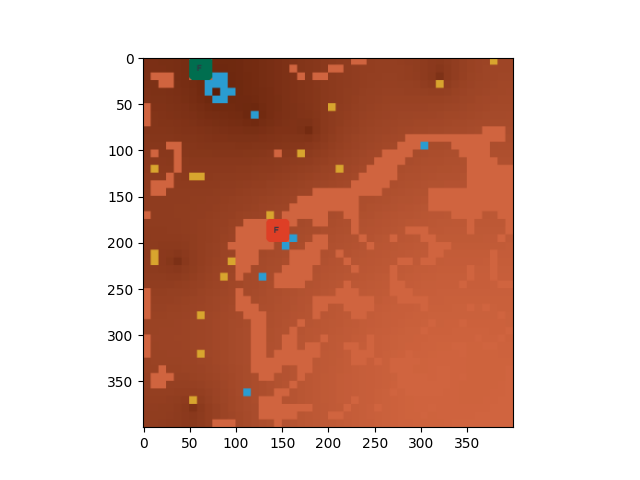

In [15]:
img = env.render("rgb_array")
plt.figure()
plt.imshow(img)
plt.show()

In [4]:
full_obs_dict = asdict(full_obs)

def show_plot(obs_dict: dict, key: str, i: int):
    plt.figure()
    data = obs_dict[key][i]
    title = f"{key} - {i}"
    
    plt.imshow(data, vmin=-1, vmax=1, cmap='gray')
    plt.title(title)
    plt.show()
    
def display_key(obs_dict, key: str):
    plt.close()
    if type(obs_dict[key]) in [dict, int]:
        return
    for i in range(obs_dict[key].shape[0]):
        show_plot(obs_dict, key, i)
     
keys = list(full_obs_dict.keys())
keys.remove("teams")
keys.remove("factories_per_team")
widgets.interact(lambda key: display_key(full_obs_dict, key), key=keys);

interactive(children=(Dropdown(description='key', options=('tile_has_ice', 'tile_has_ore', 'tile_has_lichen_st…

In [14]:
from lux_entry.wrappers.observations import FullObservation

partial_obs_dict = None
last_pos = (-1, -1)

def display_key_at_pos(obs: FullObservation, key: str, pos: tuple[int, int]):
    global last_pos, partial_obs_dict
    if pos != last_pos:
        last_pos = pos
        partial_obs = partial_obs_from(obs, pos)
        partial_obs_dict = asdict(partial_obs)
    display_key(partial_obs_dict, key)
    
widgets.interact(lambda key, x, y: display_key_at_pos(full_obs, key, (x, y)), key=keys, x=(0,48,1), y=(0,48,1));

interactive(children=(Dropdown(description='key', options=('tile_has_ice', 'tile_has_ore', 'tile_has_lichen_st…